In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from IPython.core.interactiveshell import InteractiveShell
#setting to print all executed lines
InteractiveShell.ast_node_interactivity = "all"
import kds
# tree 1 using the stopping rule
from sklearn import tree
from sklearn.tree import export_text

In [2]:
#import dataset
df = pd.read_csv('../enrollment.csv')

In [3]:
#Observe the data before wrangling
df.head()
df.describe(include='all')
df.info()

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
0,C,N,NaN,NaN,0,21MAY14,1,0,0,1,...,0,0,0,4,0.017183,0.02038,0.037652,NaN,NaN,N
1,C,N,NaN,NaN,0,15FEB13,1,0,0,1,...,0,0,1,19,0.017183,0.02038,0.037652,NaN,NaN,N
2,B,N,NaN,NaN,0,09JUN12,2,2,0,0,...,0,0,0,27,0.017183,0.02038,0.037652,NaN,NaN,N
3,NaN,N,NaN,NaN,0,25NOV11,3,2,1,0,...,0,0,1,34,0.017183,0.02038,0.037652,NaN,NaN,N
4,NaN,N,NaN,NaN,0,06DEC10,1,1,0,0,...,0,0,1,45,0.017183,0.02038,0.037652,NaN,NaN,N


,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,44283,24879,91482.000000,91482,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,211,208,NaN,1113,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,MED,MED,NaN,30JUN13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,6113,2350,NaN,6644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,NaN,NaN,0.031350,NaN,2.166098,1.214119,0.364815,0.547222,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,NaN,NaN,0.174264,NaN,1.852537,1.666529,0.557067,0.649426,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ETHNICITY            71772 non-null  object 
 1   TERRITORY            91481 non-null  object 
 2   ACADEMIC_INTEREST_1  44283 non-null  object 
 3   ACADEMIC_INTEREST_2  24879 non-null  object 
 4   Enroll               91482 non-null  int64  
 5   CONTACT_DATE         91482 non-null  object 
 6   TOTAL_CONTACTS       91482 non-null  int64  
 7   SELF_INIT_CNTCTS     91482 non-null  int64  
 8   TRAVEL_INIT_CNTCTS   91482 non-null  int64  
 9   SOLICITED_CNTCTS     91482 non-null  int64  
 10  REFERRAL_CNTCTS      91482 non-null  int64  
 11  CAMPUS_VISIT         91482 non-null  int64  
 12  CONTACT_CODE1        91339 non-null  object 
 13  LEVEL_YEAR           91482 non-null  object 
 14  IRSCHOOL             76172 non-null  object 
 15  satscore             27003 non-null 

ETHNICITY              19710
TERRITORY                  1
ACADEMIC_INTEREST_1    47199
ACADEMIC_INTEREST_2    66603
Enroll                     0
CONTACT_DATE               0
TOTAL_CONTACTS             0
SELF_INIT_CNTCTS           0
TRAVEL_INIT_CNTCTS         0
SOLICITED_CNTCTS           0
REFERRAL_CNTCTS            0
CAMPUS_VISIT               0
CONTACT_CODE1            143
LEVEL_YEAR                 0
IRSCHOOL               15310
satscore               64479
sex                     3833
mailq                      0
telecq                 70880
premiere                   0
interest                   0
stucell                    0
init_span                  0
int1rat                    0
int2rat                    0
hscrat                     0
avg_income             20929
distance               19468
Instate                    0
dtype: int64

<AxesSubplot:>

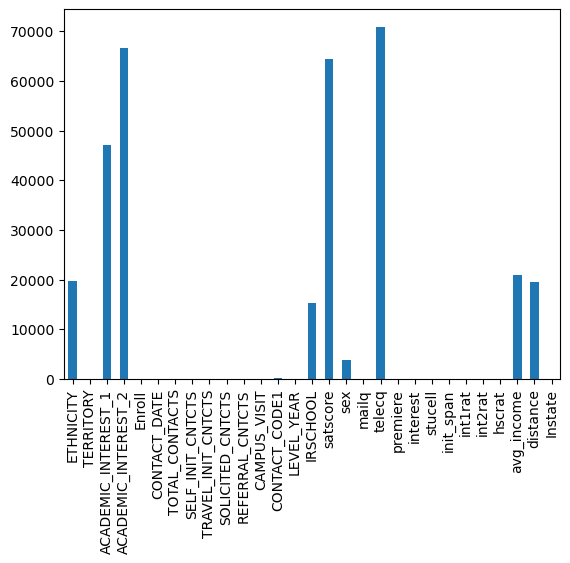

In [4]:
#There are NaN values in the dataset, hence missing values imputation is required
# print the NaN values and plot them on a bar chart
df.isna().sum()
df.isna().sum().plot(kind='bar')

<AxesSubplot:>

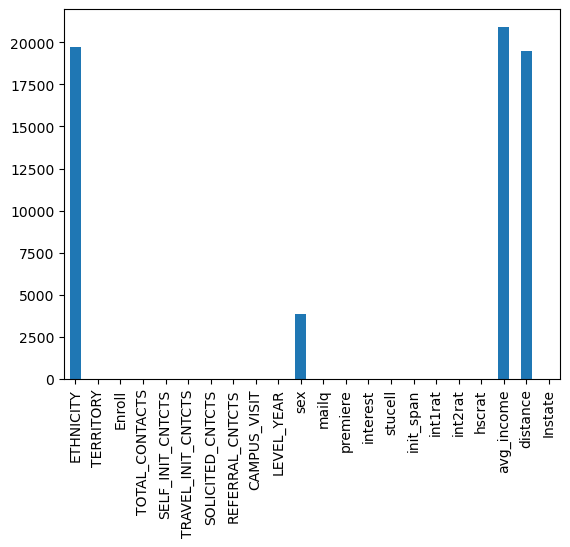

In [5]:
#in addition to the columns recommended to be dropped from the dataset, satscore and telecq have huge values of NaN values as can be seen above
#below these columns are also dropped from the dataset and the new plot of NaN values is shown
df.drop(['ACADEMIC_INTEREST_1','ACADEMIC_INTEREST_2','IRSCHOOL','CONTACT_CODE1','CONTACT_DATE','satscore','telecq'], axis=1, inplace=True)
df.isna().sum().plot(kind='bar')

In [6]:
#View the list of columns that still have NaN
df.loc[:,df.isna().any()].columns.values.tolist()

['ETHNICITY', 'TERRITORY', 'sex', 'avg_income', 'distance']

In [7]:
#Take a value count for the non-numeric fields
df['TERRITORY'].value_counts(sort=True, dropna=False)
df['ETHNICITY'].value_counts(sort=True, dropna=False)

2      14621
5      14033
7      11796
4      10611
3       9261
1       9219
6       9037
8       6644
A       3284
N       2970
000        5
NaN        1
Name: TERRITORY, dtype: int64

C      31750
NaN    19710
N      14793
H       9989
B       8477
A       3336
O       2705
I        722
Name: ETHNICITY, dtype: int64

In [8]:
#TERRITORY has only 1 value as NaN hence the row will be deleted
df.dropna(subset=['TERRITORY'], inplace=True)
#TERRITORY also has 5 rows with value 000 which is invalid in the value set because it is not an alphabet. It will be removed
df = df[df.TERRITORY != '000']
#reconfirm TERRITORY Column
df['TERRITORY'].value_counts(sort=True, dropna=False)
#ETHNICITY has significant number of NaN values which are replaced by the most occuring value
df['ETHNICITY'].fillna(df['ETHNICITY'].mode()[0], inplace=True)
#Sex, avg_income and distance are numeric fields. They are replaced by their mean
Num_nan = ['sex', 'avg_income', 'distance']
for col in Num_nan:
    df[col].fillna(df[col].mean(), inplace=True)
df.isna().sum()

2    14621
5    14033
7    11796
4    10611
3     9261
1     9219
6     9037
8     6644
A     3284
N     2970
Name: TERRITORY, dtype: int64

ETHNICITY             0
TERRITORY             0
Enroll                0
TOTAL_CONTACTS        0
SELF_INIT_CNTCTS      0
TRAVEL_INIT_CNTCTS    0
SOLICITED_CNTCTS      0
REFERRAL_CNTCTS       0
CAMPUS_VISIT          0
LEVEL_YEAR            0
sex                   0
mailq                 0
premiere              0
interest              0
stucell               0
init_span             0
int1rat               0
int2rat               0
hscrat                0
avg_income            0
distance              0
Instate               0
dtype: int64

In [9]:
# separate numerical variables AND categorical variables for the X variables
cat_var =['ETHNICITY','TERRITORY','LEVEL_YEAR','sex','mailq','Instate','premiere','stucell']
num_var = ['TOTAL_CONTACTS','SELF_INIT_CNTCTS','TRAVEL_INIT_CNTCTS','SOLICITED_CNTCTS',
'REFERRAL_CNTCTS','CAMPUS_VISIT','interest', 'init_span',
'int1rat','int2rat', 'hscrat', 'avg_income', 'distance']

In [10]:
#generate dummy variables for the categorical variables
dummy_df =pd.get_dummies(df[cat_var])
dummy_names = dummy_df.columns
dummy_df.describe()
dummy_names

,sex,mailq,premiere,stucell,ETHNICITY_A,ETHNICITY_B,ETHNICITY_C,ETHNICITY_H,ETHNICITY_I,ETHNICITY_N,...,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,LEVEL_YEAR_FR14,Instate_N,Instate_Y
count,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,...,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.0,91476.000000,91476.000000
mean,0.631619,4.084317,0.028915,0.489910,0.036469,0.092647,0.562519,0.109198,0.007893,0.161704,...,0.115998,0.153406,0.098791,0.128952,0.072631,0.035900,0.032468,1.0,0.379542,0.620458
std,0.472154,1.440357,0.167568,0.499901,0.187454,0.289939,0.496079,0.311889,0.088491,0.368181,...,0.320224,0.360381,0.298383,0.335148,0.259531,0.186042,0.177239,0.0,0.485276,0.485276
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
75%,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000
max,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


Index(['sex', 'mailq', 'premiere', 'stucell', 'ETHNICITY_A', 'ETHNICITY_B',
       'ETHNICITY_C', 'ETHNICITY_H', 'ETHNICITY_I', 'ETHNICITY_N',
       'ETHNICITY_O', 'TERRITORY_1', 'TERRITORY_2', 'TERRITORY_3',
       'TERRITORY_4', 'TERRITORY_5', 'TERRITORY_6', 'TERRITORY_7',
       'TERRITORY_8', 'TERRITORY_A', 'TERRITORY_N', 'LEVEL_YEAR_FR14',
       'Instate_N', 'Instate_Y'],
      dtype='object')

In [11]:
#Construct X variables
x = pd.concat([df[num_var],dummy_df[dummy_names]],axis=1)
x.describe(include='all')

,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,interest,init_span,int1rat,int2rat,...,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,LEVEL_YEAR_FR14,Instate_N,Instate_Y
count,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,...,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.000000,91476.0,91476.000000,91476.000000
mean,2.166153,1.214122,0.364839,0.547247,0.039901,0.034676,0.053642,19.686967,0.037091,0.042896,...,0.115998,0.153406,0.098791,0.128952,0.072631,0.035900,0.032468,1.0,0.379542,0.620458
std,1.852576,1.666568,0.557077,0.649433,0.226198,0.187328,0.242059,8.721500,0.024026,0.025244,...,0.320224,0.360381,0.298383,0.335148,0.259531,0.186042,0.177239,0.0,0.485276,0.485276
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.049270,0.056670,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000
max,58.000000,56.000000,8.000000,9.000000,5.000000,2.000000,3.000000,228.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [12]:
#self-initiated contact count is highly correlated with total contact count
#there is also strong correlation between 5-year primary & seconday interest code rate and the instate dummy variable
#we execute the following code to reduce the impact of correlation
x.drop(inplace=True, columns=['TOTAL_CONTACTS','int1rat','int2rat','distance'])
x.corr()

,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,interest,init_span,hscrat,avg_income,sex,...,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,LEVEL_YEAR_FR14,Instate_N,Instate_Y
SELF_INIT_CNTCTS,1.000000,0.059156,0.005819,0.035479,0.339548,0.283897,-0.041564,0.231157,0.166142,0.014408,...,0.020729,-0.049250,0.022445,-0.001170,0.067189,-0.046406,-0.030346,NaN,-0.145825,0.145825
TRAVEL_INIT_CNTCTS,0.059156,1.000000,-0.339057,-0.045777,0.002800,0.105856,0.116931,-0.026882,-0.046230,0.025271,...,0.010093,0.003442,0.004337,-0.005776,0.022760,-0.016785,-0.043022,NaN,-0.223375,0.223375
SOLICITED_CNTCTS,0.005819,-0.339057,1.000000,-0.071772,-0.026856,-0.008995,0.234363,-0.020879,-0.000017,0.059607,...,-0.022700,0.010579,0.014133,0.000988,0.010967,0.020977,-0.065658,NaN,0.141391,-0.141391
REFERRAL_CNTCTS,0.035479,-0.045777,-0.071772,1.000000,0.016107,0.026995,0.043553,0.024081,-0.005155,-0.003768,...,-0.018019,-0.017425,0.015940,-0.001107,0.002215,-0.011439,-0.018408,NaN,-0.017162,0.017162
CAMPUS_VISIT,0.339548,0.002800,-0.026856,0.016107,1.000000,0.116649,0.043004,0.128340,0.111515,0.007381,...,0.002926,-0.026007,0.021247,-0.020379,0.072992,-0.021918,-0.007569,NaN,-0.048452,0.048452
interest,0.283897,0.105856,-0.008995,0.026995,0.116649,1.000000,-0.005903,0.069981,0.025576,0.003143,...,0.015626,-0.002101,0.007300,-0.001451,-0.009292,-0.023101,-0.020975,NaN,-0.061182,0.061182
init_span,-0.041564,0.116931,0.234363,0.043553,0.043004,-0.005903,1.000000,-0.054469,-0.024922,0.070605,...,-0.001493,-0.001722,-0.012632,0.010250,0.000438,0.017794,-0.055284,NaN,0.069467,-0.069467
hscrat,0.231157,-0.026882,-0.020879,0.024081,0.128340,0.069981,-0.054469,1.000000,0.223727,-0.020954,...,0.015659,-0.075706,0.046149,-0.029372,0.089999,-0.051351,0.004242,NaN,-0.147477,0.147477
avg_income,0.166142,-0.046230,-0.000017,-0.005155,0.111515,0.025576,-0.024922,0.223727,1.000000,-0.018808,...,0.035706,-0.172066,0.042960,-0.008601,0.070779,0.067389,-0.000619,NaN,-0.018108,0.018108
sex,0.014408,0.025271,0.059607,-0.003768,0.007381,0.003143,0.070605,-0.020954,-0.018808,1.000000,...,0.005781,-0.000234,-0.001746,0.006990,-0.023289,0.016582,-0.039362,NaN,0.021515,-0.021515


In [13]:
#Data Partision
y = df['Enroll']
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=4)

In [14]:
#build classification model on the training data using decision tree
tr = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=50,random_state = 4)
tr = tr.fit(x_train,y_train)

In [15]:
# display the decision tree in a text format
r = export_text(tr, feature_names=list(x_train.columns.values))
print(r)

|--- SELF_INIT_CNTCTS <= 4.50
|   |--- SELF_INIT_CNTCTS <= 2.50
|   |   |--- hscrat <= 0.83
|   |   |   |--- hscrat <= 0.35
|   |   |   |   |--- class: 0
|   |   |   |--- hscrat >  0.35
|   |   |   |   |--- class: 0
|   |   |--- hscrat >  0.83
|   |   |   |--- class: 1
|   |--- SELF_INIT_CNTCTS >  2.50
|   |   |--- hscrat <= 0.26
|   |   |   |--- hscrat <= 0.04
|   |   |   |   |--- class: 0
|   |   |   |--- hscrat >  0.04
|   |   |   |   |--- class: 0
|   |   |--- hscrat >  0.26
|   |   |   |--- stucell <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- stucell >  0.50
|   |   |   |   |--- class: 1
|--- SELF_INIT_CNTCTS >  4.50
|   |--- hscrat <= 0.02
|   |   |--- hscrat <= 0.00
|   |   |   |--- class: 0
|   |   |--- hscrat >  0.00
|   |   |   |--- SELF_INIT_CNTCTS <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- SELF_INIT_CNTCTS >  7.50
|   |   |   |   |--- class: 1
|   |--- hscrat >  0.02
|   |   |--- premiere <= 0.50
|   |   |   |--- hscrat <= 0.13
|   |   |   |   |--- cla

<Figure size 2500x2000 with 0 Axes>

[Text(0.4583333333333333, 0.9, 'SELF_INIT_CNTCTS <= 4.5\ngini = 0.061\nsamples = 64033\nvalue = [62009, 2024]\nclass = y[0]'),
 Text(0.22916666666666666, 0.7, 'SELF_INIT_CNTCTS <= 2.5\ngini = 0.025\nsamples = 60581\nvalue = [59823, 758]\nclass = y[0]'),
 Text(0.125, 0.5, 'hscrat <= 0.833\ngini = 0.008\nsamples = 55482\nvalue = [55270, 212]\nclass = y[0]'),
 Text(0.08333333333333333, 0.3, 'hscrat <= 0.347\ngini = 0.007\nsamples = 55466\nvalue = [55270, 196]\nclass = y[0]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.007\nsamples = 55384\nvalue = [55203, 181]\nclass = y[0]'),
 Text(0.125, 0.1, 'gini = 0.299\nsamples = 82\nvalue = [67, 15]\nclass = y[0]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = y[1]'),
 Text(0.3333333333333333, 0.5, 'hscrat <= 0.261\ngini = 0.191\nsamples = 5099\nvalue = [4553, 546]\nclass = y[0]'),
 Text(0.25, 0.3, 'hscrat <= 0.041\ngini = 0.173\nsamples = 4998\nvalue = [4521, 477]\nclass = y[0]'),
 Text(0.20833333333333334, 0

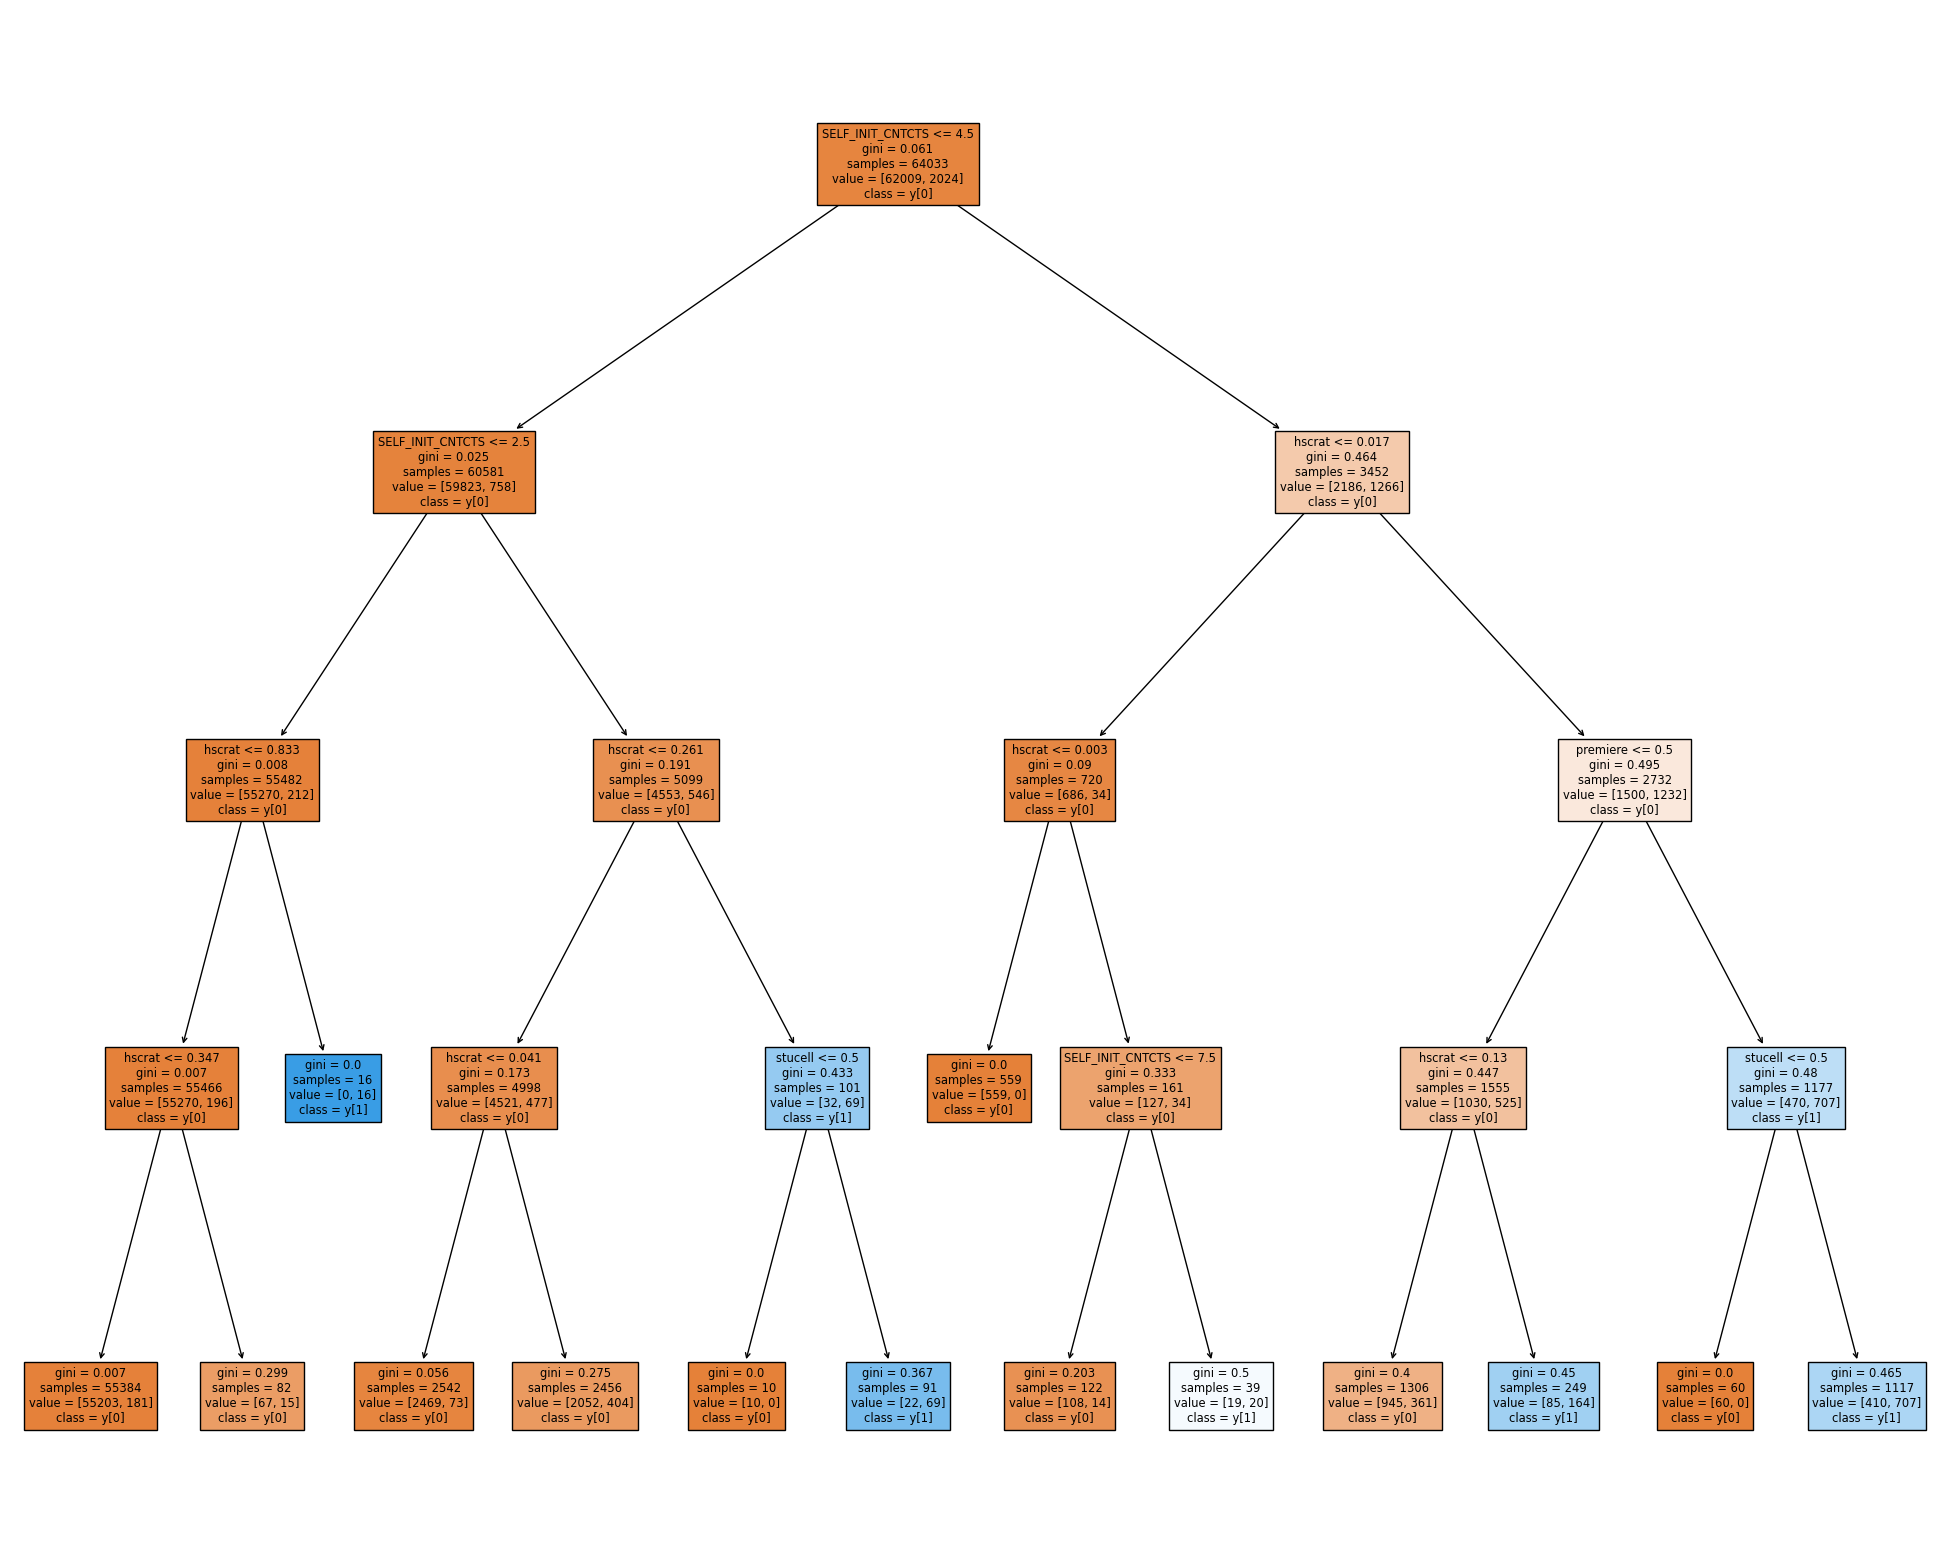

In [16]:
#plot and display tree
plt.figure(figsize=[25,20])
tree.plot_tree(tr,feature_names=list(x_train.columns.values),class_names=True,filled=True)
plt.show()

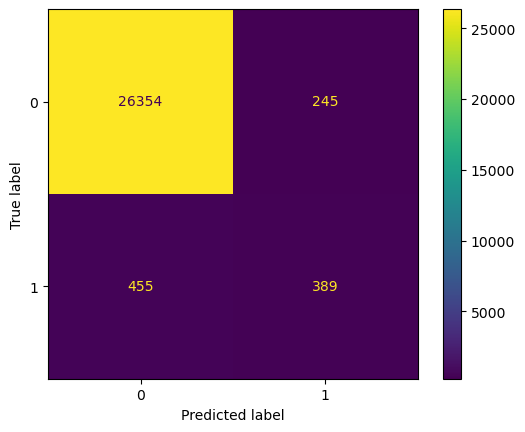

In [17]:
#use the decision tree model to predict on the validation set
prediction = tr.predict(x_val)
cm = confusion_matrix(y_val,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
tr.score(x_val,y_val) # accuracy

0.9744925846299602

In [19]:
pred =tr.predict_proba(x_val) # Probability estimates
print(pred)
tree_auc =roc_auc_score(y_val, pred[:,1])
print(tree_auc)

[[0.99673191 0.00326809]
 [0.99673191 0.00326809]
 [0.99673191 0.00326809]
 ...
 [0.99673191 0.00326809]
 [0.99673191 0.00326809]
 [0.99673191 0.00326809]]
0.9297937785495625


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

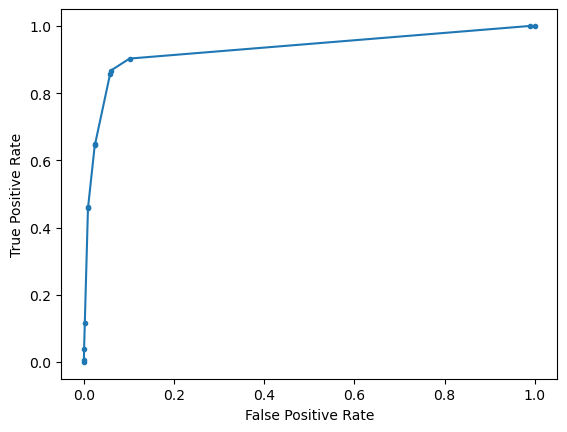

In [20]:
# visualization of roc curve
tree_fpr, tree_tpr, threshold =roc_curve(y_val, pred[:,1])
plt.plot(tree_fpr,tree_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

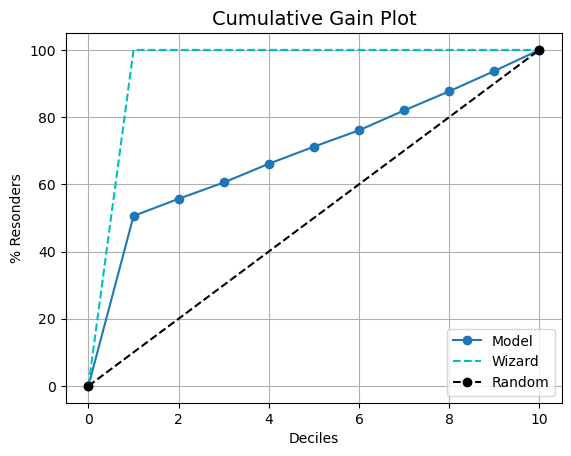

In [21]:
kds.metrics.plot_cumulative_gain(y_val, prediction)